## Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as ndi
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.stats import mad_std
from photutils.segmentation import detect_sources, SourceCatalog
from photutils.background import Background2D, MedianBackground
import statmorph
from statmorph.utils.image_diagnostics import make_figure

## Import data

In [2]:
path='Savary_training_set_lenses/'
lensed='Lens_simulations/'
non_lensed='LRG_only/'
lensed_source='lensed_source_only/'
files_lensed=os.listdir(path+lensed)
files_non_lensed=os.listdir(path+non_lensed)

In [3]:
files=[file for file in files_lensed if file in files_non_lensed] #Only take files both present in both directories

### data visualisation

we visualize the 9 first raw images of each category

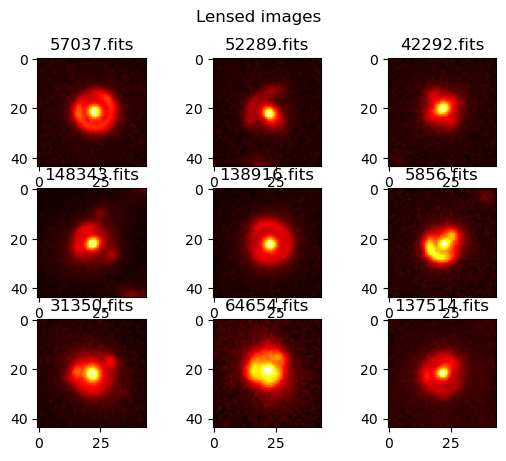

In [4]:
# plot of 9 first lensed images
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file)
    plt.imshow(image, cmap='hot')
plt.show()

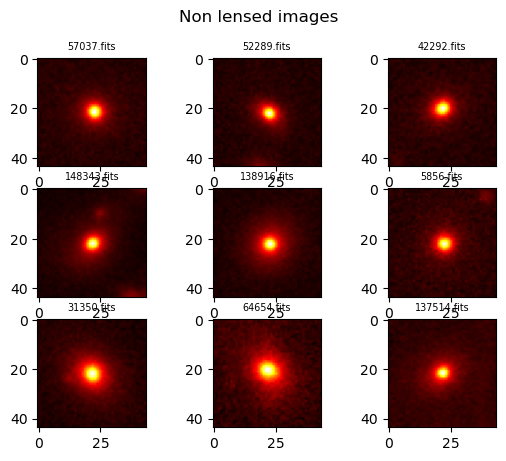

In [5]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Non lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

## Detection of sources

we will detect sources and select the right mask

First let's visualize the 9 first segmentation maps

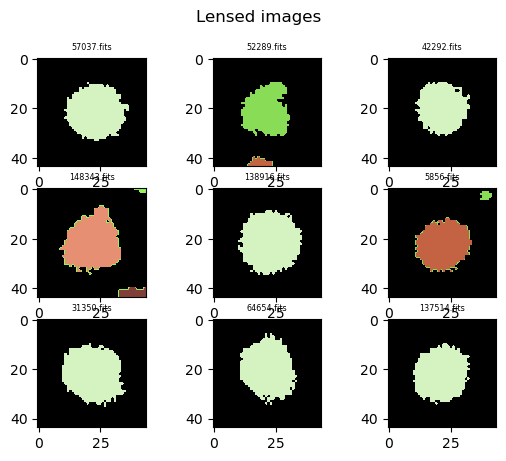

In [6]:
for count, file in zip(range(1,10),files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='xx-small')
    plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

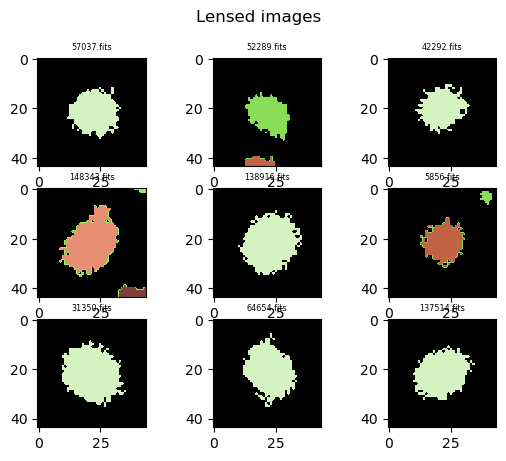

In [7]:
for count, file in zip(range(1,10),files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='xx-small')
    plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

### Now, let's select the main source. It is the sethe nearest to the center of the image

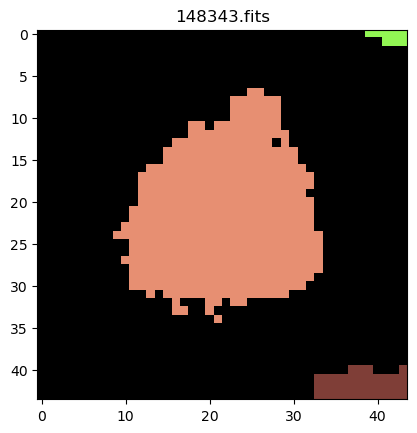

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   44                                                  NAXIS2  =                   44                                                  ID_SIM  = '00148343'                                                            HIERARCH ID_source = 20091011                                                   RA_LENS =      346.55582145504                                                  DEC_LENS=     31.0922639113368                                                  HIERARCH ra_source = 150.0800628                                                HIERARCH dec_source = 2.2274901                                                 ZL      =   0.3376845419406889                                                  ZS      =               3.7029          

In [8]:
file=files[3]
file_path=path+lensed+file
image, header = fits.getdata(file_path, header=True)
std = mad_std(image)
threshold=2.5*std
segm = detect_sources(image, threshold, npixels=5)
plt.title(file)
plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

print(header)

In [9]:
def galaxy_map(segm):
    label = np.argmax(segm.areas)+1
    segm_map=1*(segm.data==label)
    return segm_map

def galaxy_label(segm):
    label = np.argmax(segm.areas)+1
    return label

def mask(segm):
    galaxy=(galaxy_map(segm))
    segm_map=segm.data!=0
    mask=segm_map-galaxy
    bool_mask=mask==1
    return bool_mask

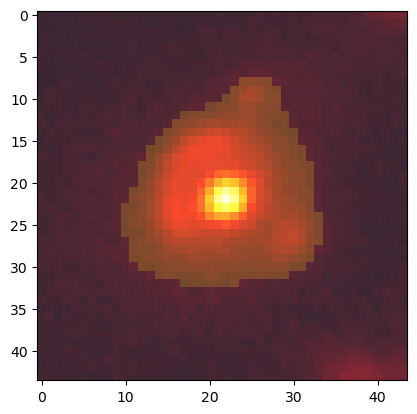

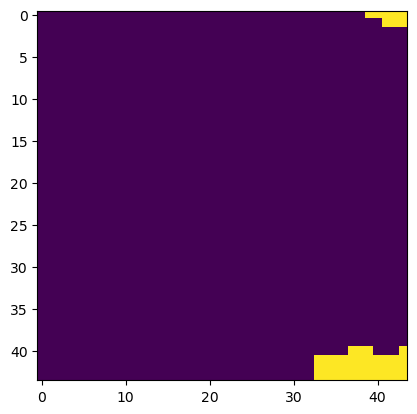

In [10]:
segm_map=galaxy_map(segm)

segmap_float = ndi.uniform_filter(np.float64(segm_map), size=5)
segm_map = segmap_float > 0.5

Mask=mask(segm)

plt.imshow(segm_map, alpha=0.5)
plt.imshow(image, alpha=0.7, cmap='hot')
plt.show()
plt.imshow(Mask)
plt.show()

## Let's take a look at the rms and how it is linked to the images

In [11]:
RMS='Lenses/RMS/'
PSF='Lenses/PSF/'

In [12]:
def f(x,a,b):
    return(a*x+b)

a=0.020022051438563258,gain calculé=49.94493211989061, b=5.260813531709831
gain de l'image=52.5017432309

a=0.021169011165188545,gain calculé=47.238862136576955, b=3.6364124232716994
gain de l'image=47.37612528999

a=0.021212145763784794,gain calculé=47.14280257810062, b=6.540438300153897
gain de l'image=46.94637051385

a=0.01927614239585755,gain calculé=51.87759975330439, b=5.0386125730521
gain de l'image=51.91102855098

a=0.02380611502899188,gain calculé=42.006013949868205, b=5.405077422312915
gain de l'image=41.94063253633

a=0.013536607323622607,gain calculé=73.87375404285454, b=3.599179856173533
gain de l'image=72.92746045316

a=0.02264997900067922,gain calculé=44.1501513078671, b=4.75467495691774
gain de l'image=44.00764948075

a=0.01863693965568038,gain calculé=53.656878139604245, b=4.526348338613143
gain de l'image=53.36918721413

a=0.027570262601052116,gain calculé=36.27096391754494, b=4.94791083304661
gain de l'image=36.3305506692

a=0.0263158741052002,gain calculé=37.9998777

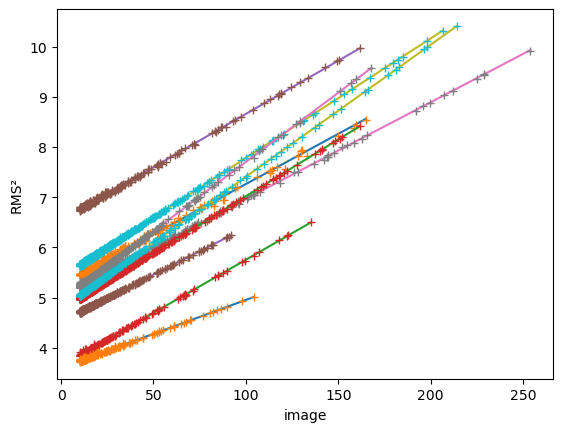

In [13]:
def high_pass(x,y,cut):
    args=np.where(x>=cut)
    return(x[args],y[args])


b,gain=[],[]
for file in files[:10]:
    file_path=path+non_lensed+file
    rms_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    rms,rms_header= fits.getdata(rms_path, header=True)
    image=np.ravel(image)
    rms=np.ravel(rms)
    
    clean=high_pass(image,rms**2,10)
    
    #popt,pcov=curve_fit(f,image,rms**2)
    popt,pcov=curve_fit(f,*clean)
    print(f'a={popt[0]},gain calculé={1/popt[0]}, b={popt[1]}')
    gain_rms=rms_header['gain']
    gain_image=header['GAIN']
    print(f'gain de l\'image={gain_image}\n')
    
    b.append(popt[1])
    gain.append(gain_image)
    
    x=np.linspace(np.min(clean[0]),np.max(clean[0]),100)
    y=f(x,*popt)
    
    plt.plot(x,y)
    
    plt.plot(*clean,'+')
    plt.xlabel('image')
    plt.ylabel('RMS²')
plt.show()


## Cross test: do we get the gain by taking pixel/rms ?

In [14]:
true_gain,computed_gain=[],[]

for file in files[:10]:
    file_path=path+non_lensed+file
    rms_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    rms,rms_header= fits.getdata(rms_path, header=True)
    image=np.ravel(image)
    rms=np.ravel(rms)
    
    gain=header['GAIN']
    exptime=header['EXPTIME']
        
    true_gain.append(header['GAIN'])
    comp_gain=image/rms
    #test=comp_gain+np.sqrt(2.3*exptime)
    mean_comp_gain=np.mean(comp_gain)
    #mean_test=np.mean(test)
    computed_gain.append(mean_comp_gain)
    
    print(f'true gain={gain}, computed gain={mean_comp_gain}\n')
    #print(f'test={mean_test}')
    print(comp_gain ,'\n')


true gain=52.5017432309, computed gain=2.5349142510696807

[1.30028823 1.13393001 1.87933116 ... 0.09457515 1.140021   1.08574288] 

true gain=47.37612528999, computed gain=1.8471870083599542

[-0.13198619 -1.55577711 -0.8843352  ... -1.41159018  0.34625287
  0.21579958] 

true gain=46.94637051385, computed gain=2.119495731134656

[ 0.06037451 -0.49055578  0.25926895 ... -0.02090435 -0.60168759
 -0.79996651] 

true gain=51.91102855098, computed gain=6.005211447463727

[2.95373881e-01 3.02358132e-01 1.20108922e-02 ... 1.24261180e+01
 1.28488484e+01 1.22719004e+01] 

true gain=41.94063253633, computed gain=4.398260638118853

[ 0.65621085  0.77953188  0.86334323 ...  0.23836122 -1.02328698
 -0.02859746] 

true gain=72.92746045316, computed gain=1.9966541708268746

[ 0.15164978  1.18069414 -1.14876278 ...  0.13470561  0.17037072
 -2.30066316] 

true gain=44.00764948075, computed gain=5.005246626567942

[0.68611391 1.65565141 0.82526102 ... 0.74550461 1.9124436  1.98808631] 

true gain=53.3

## Let's see if the lensed image is the addition of the deflector and the lensed source only

What we will do is substracting lensed source only and the deflector and see if the result is 0.

In [15]:
ok_file=0
for file in files:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    source_path=path+lensed_source+file
    source, source_header= fits.getdata(source_path, header=True)
    lrg_path=path+non_lensed+file
    lrg, header_lrg = fits.getdata(lrg_path, header=True)
    
    substracted=image-source-lrg
    pixel_sum=np.sum(substracted)
    if pixel_sum==0:
        ok_file+=1
print(f'{ok_file/len(files)*100}% of the files are source+deflector')
    
    

100.0% of the files are source+deflector


## Now, we will apply statmorph

note that statmorph required a background substraction.
For now we just ignore warnings and errors.
we will look for what's going on later !


developpers also noticed that we do not take the fit into account when flag=1 (for basic morphological params) and flag_sersic=1 (for sersic fit)
and also if the radius is.... (I need to find back the documentation page for the condition)

57037.fits
flag_sersic=0
flag=0
sersic_amplitude = 121.5333243299868
sersic_rhalf = 6.0248288604639235
sersic_n = 0.18470704329430226
sersic_xc = 22.787309325447993
sersic_yc = 21.799548416164715
sersic_ellip = 0.20074400121264738
sersic_theta = 2.8086124540536717 



52289.fits
flag_sersic=1
flag=1
sersic_amplitude = 22.36980972089844
sersic_rhalf = 6.660668533088386
sersic_n = 1.206390230347357
sersic_xc = 22.228209557529844
sersic_yc = 22.304849411854597
sersic_ellip = 0.21872160970555976
sersic_theta = 0.6692896423286138 

42292.fits
flag_sersic=0
flag=0
sersic_amplitude = 76.85212948674005
sersic_rhalf = 2.9876733795492725
sersic_n = 6.281431736563401
sersic_xc = 21.02312329611113
sersic_yc = 20.072748797859546
sersic_ellip = 0.9342342950468341
sersic_theta = 1.248615266039054 



148343.fits
flag_sersic=0
flag=1
sersic_amplitude = 28.439016660614598
sersic_rhalf = 10.250226371484416
sersic_n = 1.41374848897817
sersic_xc = 21.69999041764345
sersic_yc = 21.661732054304846
sersic_ellip = 0.03635897873267139
sersic_theta = 2.903079232273978 

138916.fits
flag_sersic=0
flag=0
sersic_amplitude = 63.05362594590851
sersic_rhalf = 6.728809103838001
sersic_n = 1.4456176202103088
sersic_xc = 22.707650615863997
sersic_yc = 21.86169044514787
sersic_ellip = 0.15613134656126182
sersic_theta = 1.6687097558263317 

bug


31350.fits
flag_sersic=0
flag=1
sersic_amplitude = 30.874799222073314
sersic_rhalf = 8.817970202095944
sersic_n = 2.874184788819604
sersic_xc = 21.412631878096235
sersic_yc = 22.134151712239536
sersic_ellip = 0.24999518728525882
sersic_theta = 0.17411941424398014 

64654.fits
flag_sersic=0
flag=0
sersic_amplitude = 114.11825773568158
sersic_rhalf = 4.741105229095547
sersic_n = 0.29753617559802414
sersic_xc = 21.085466681607954
sersic_yc = 20.374274195834495
sersic_ellip = -0.04450204966575276
sersic_theta = 1.7505111971746494 

137514.fits
flag_sersic=0
flag=0
sersic_amplitude = 35.609696205151295
sersic_rhalf = 7.3148813598208795
sersic_n = 2.963697682278303
sersic_xc = 21.255017329194878
sersic_yc = 21.61532733167916
sersic_ellip = 0.3169895919588333
sersic_theta = 2.399205971408498 



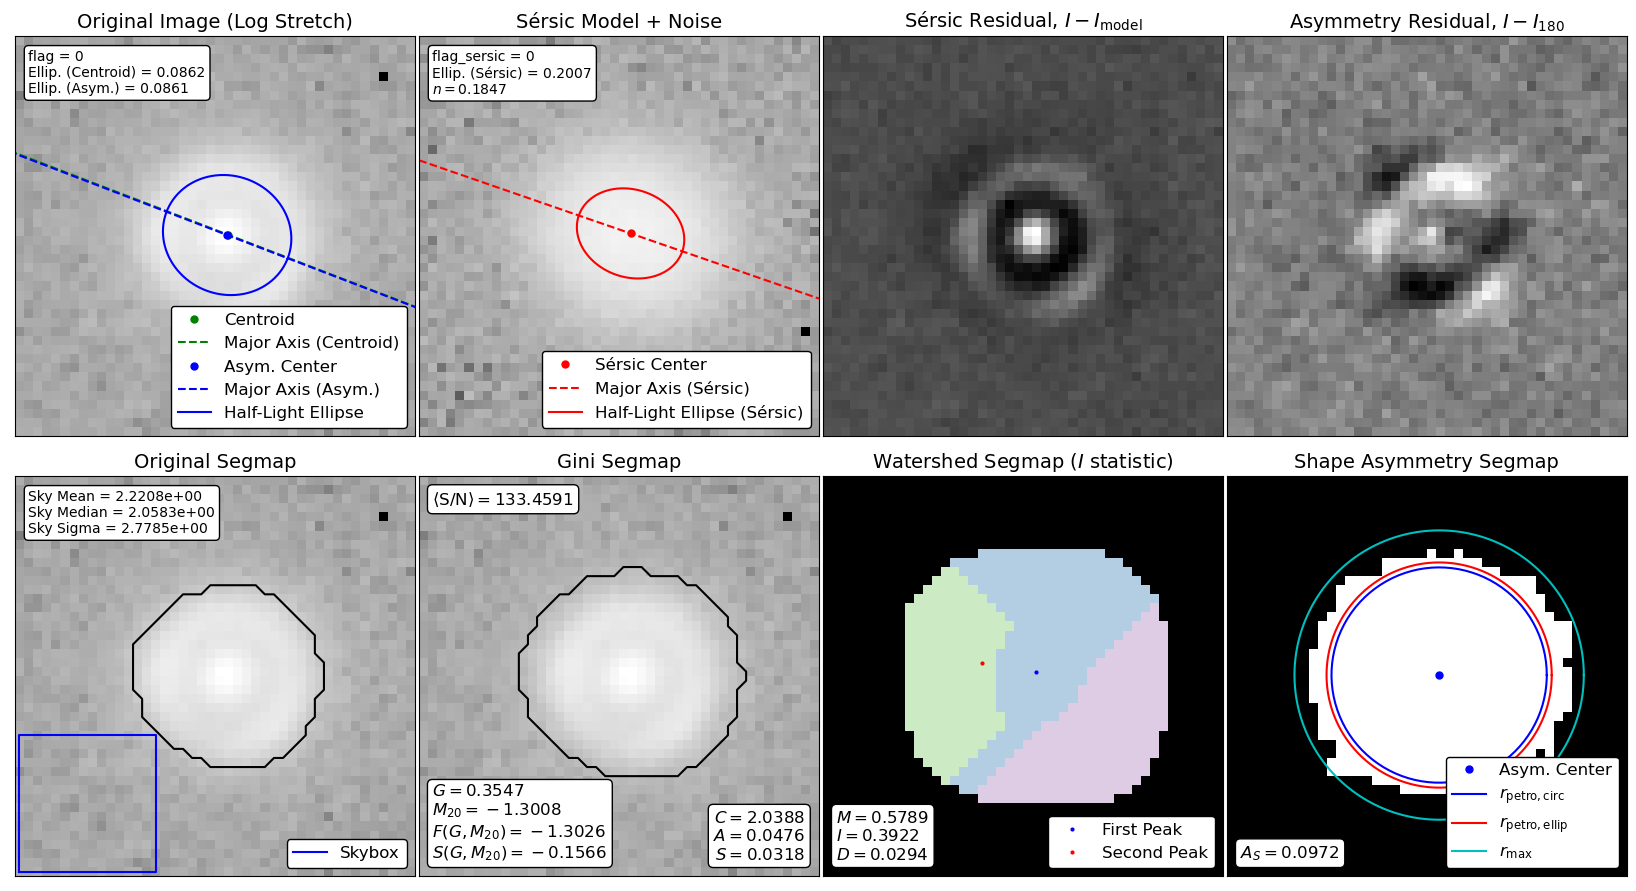

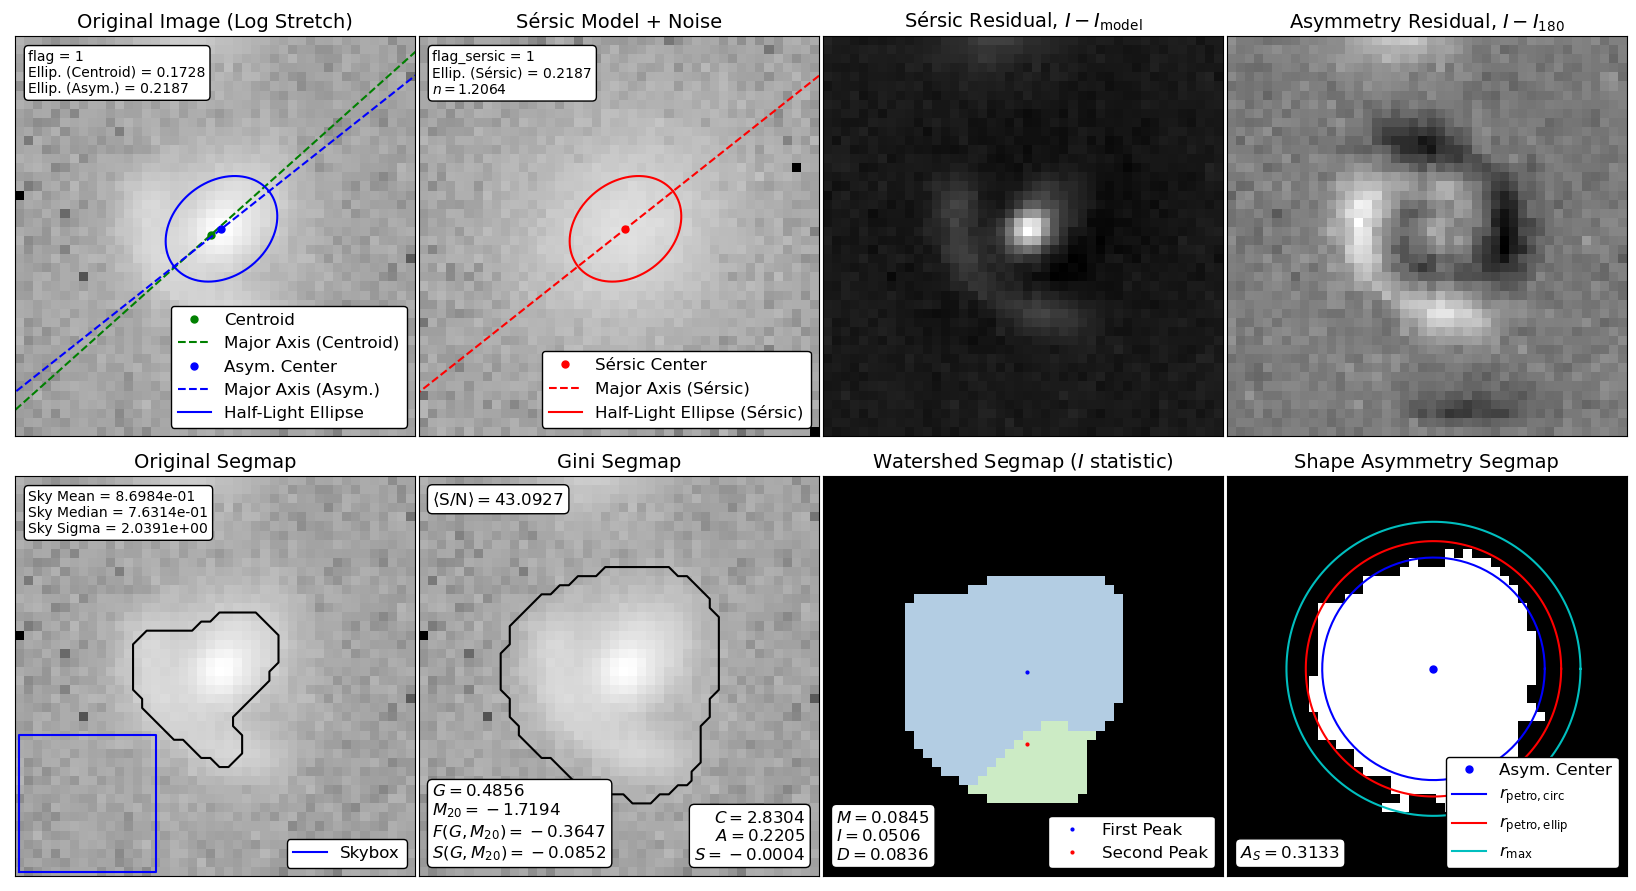

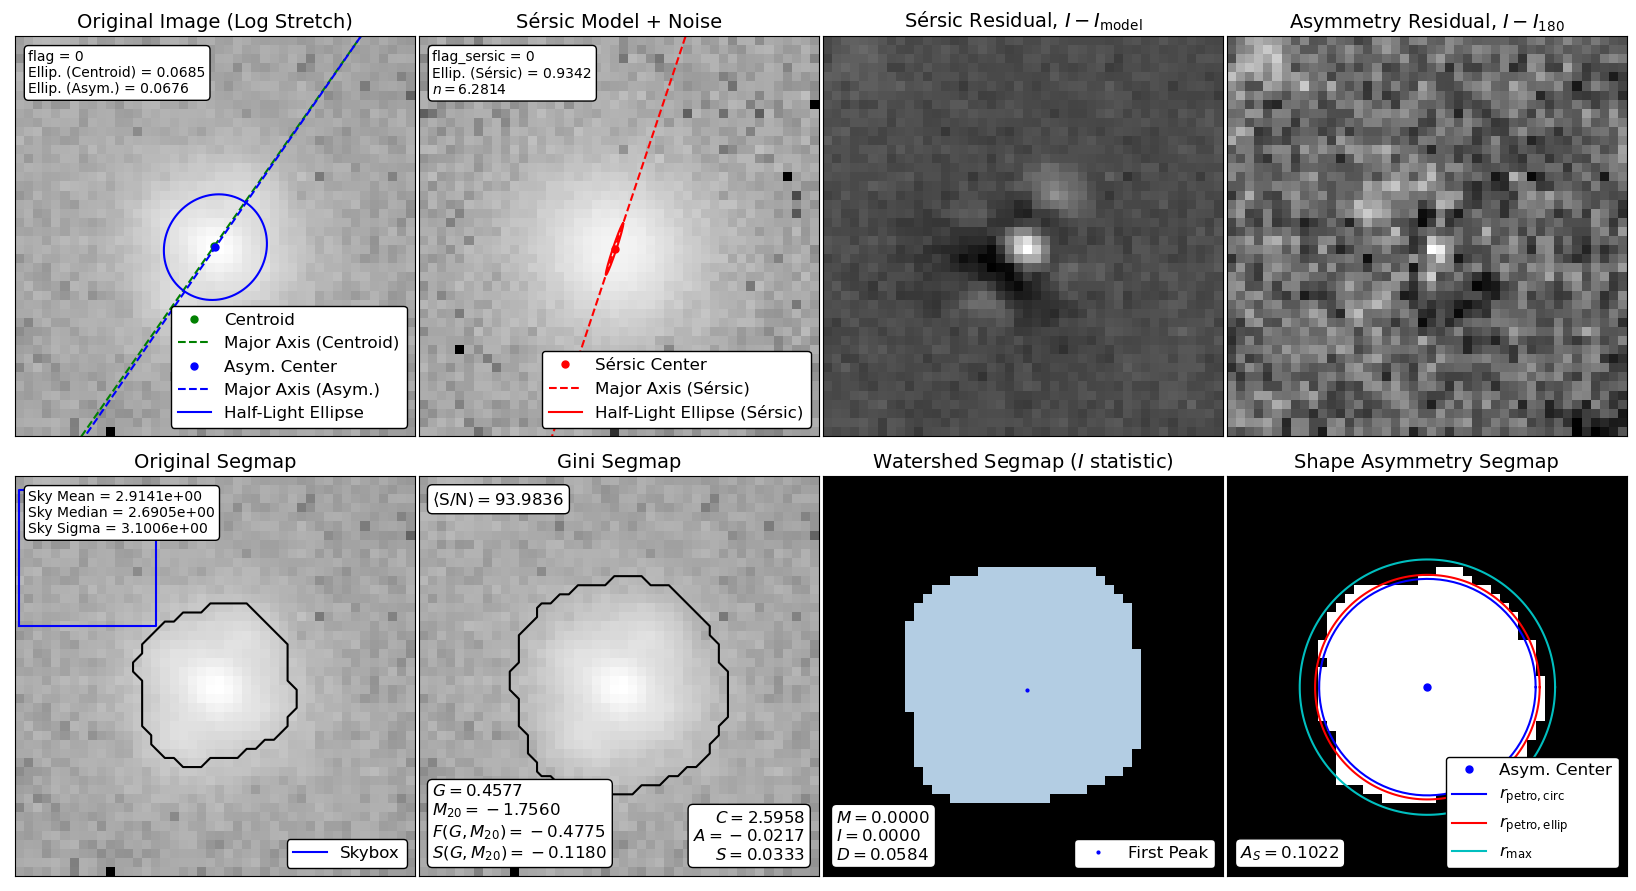

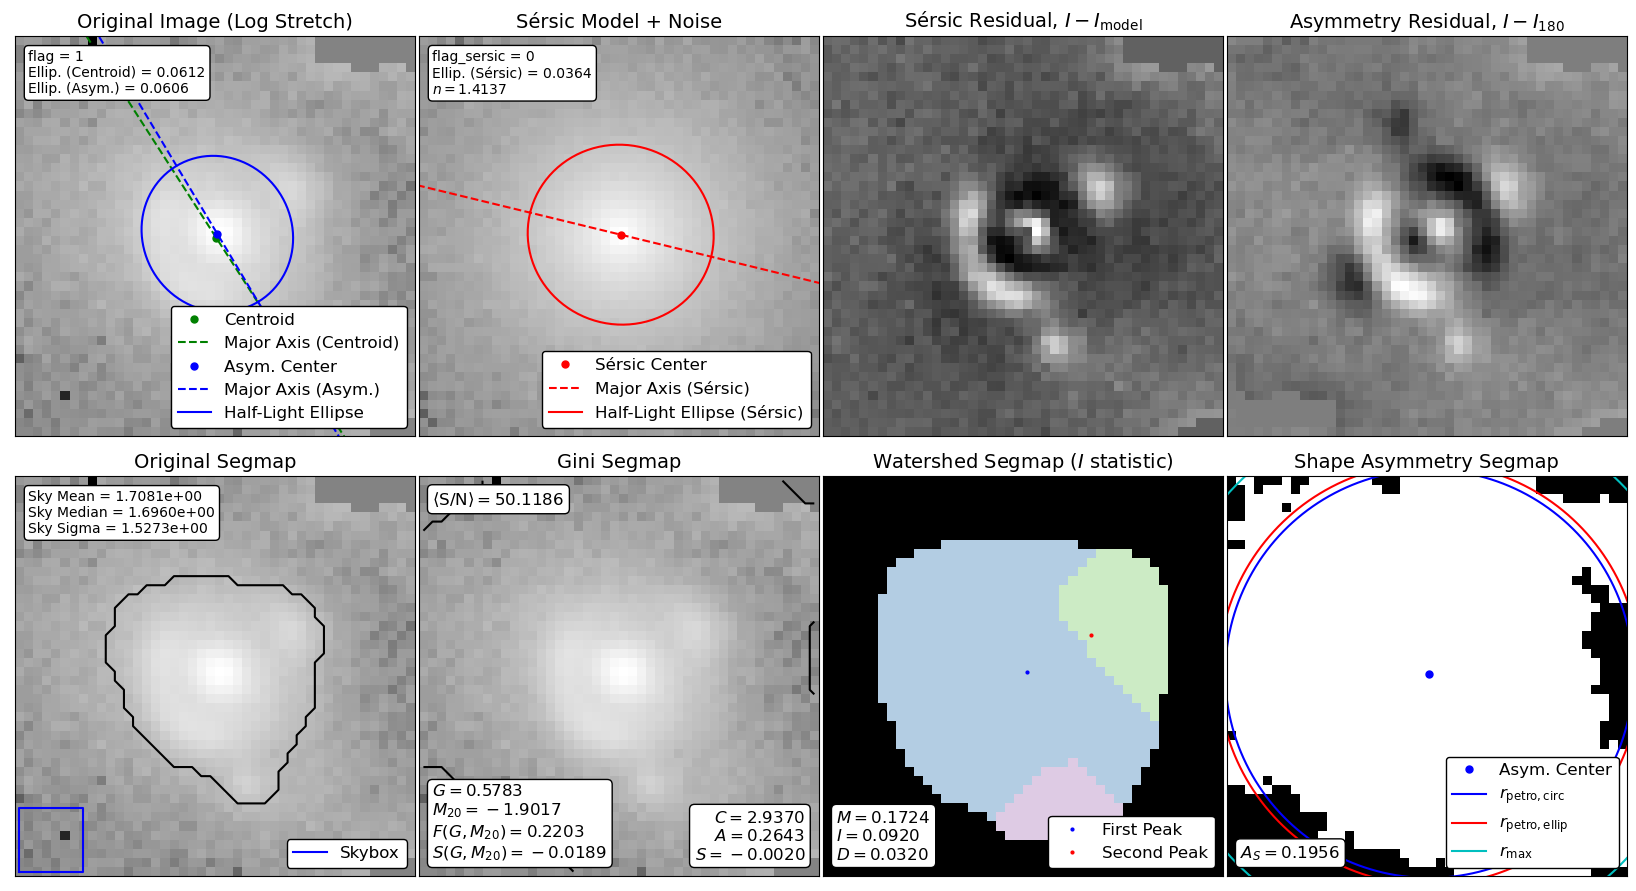

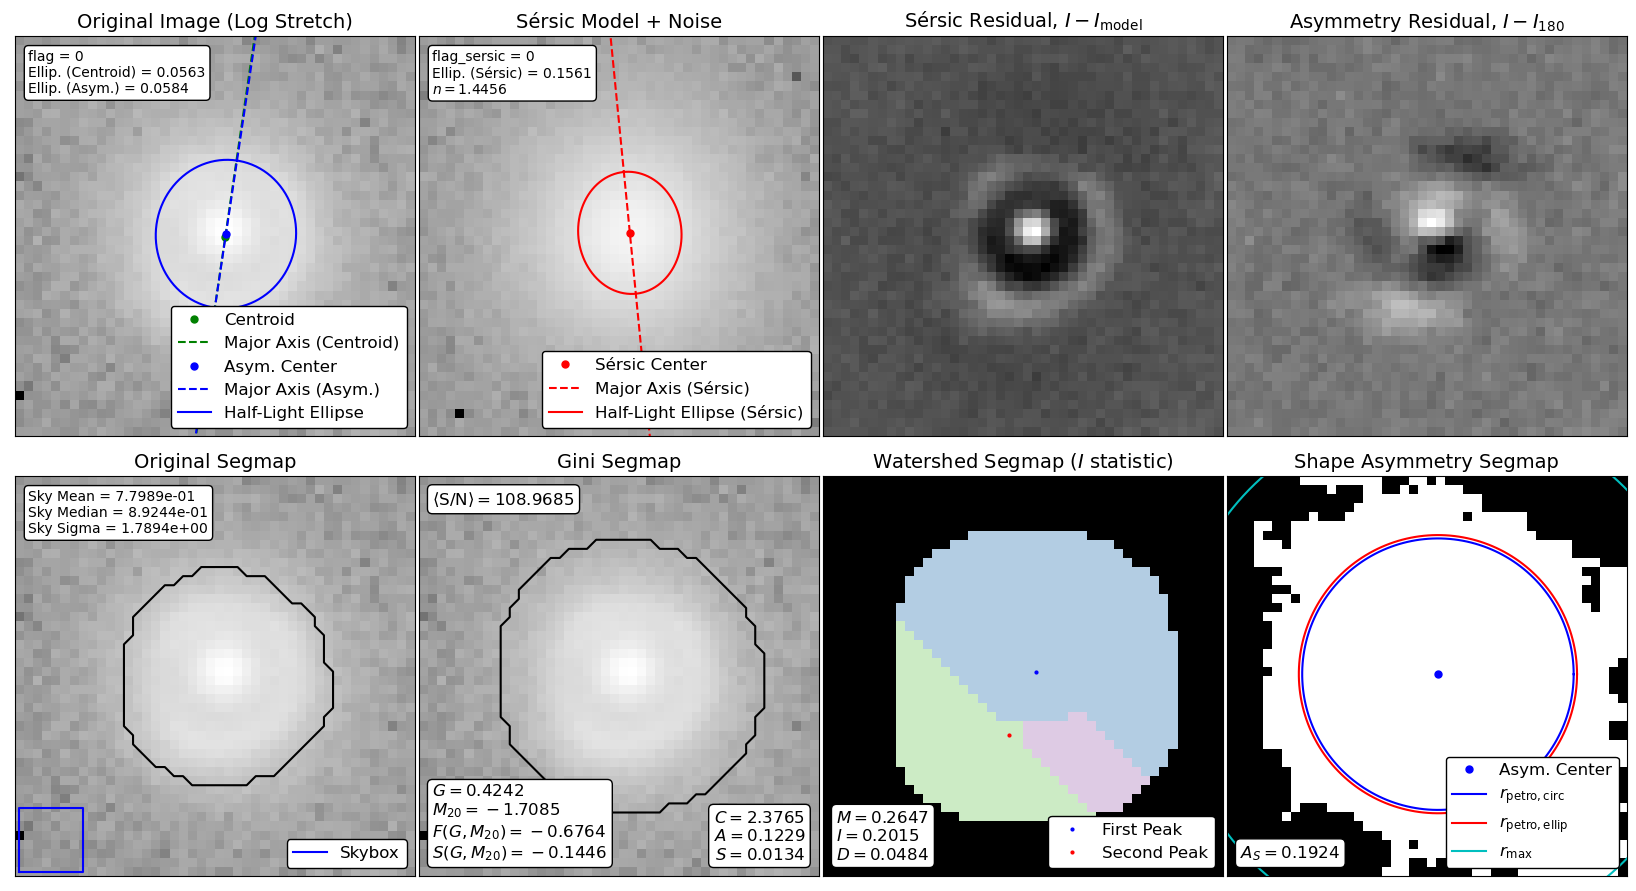

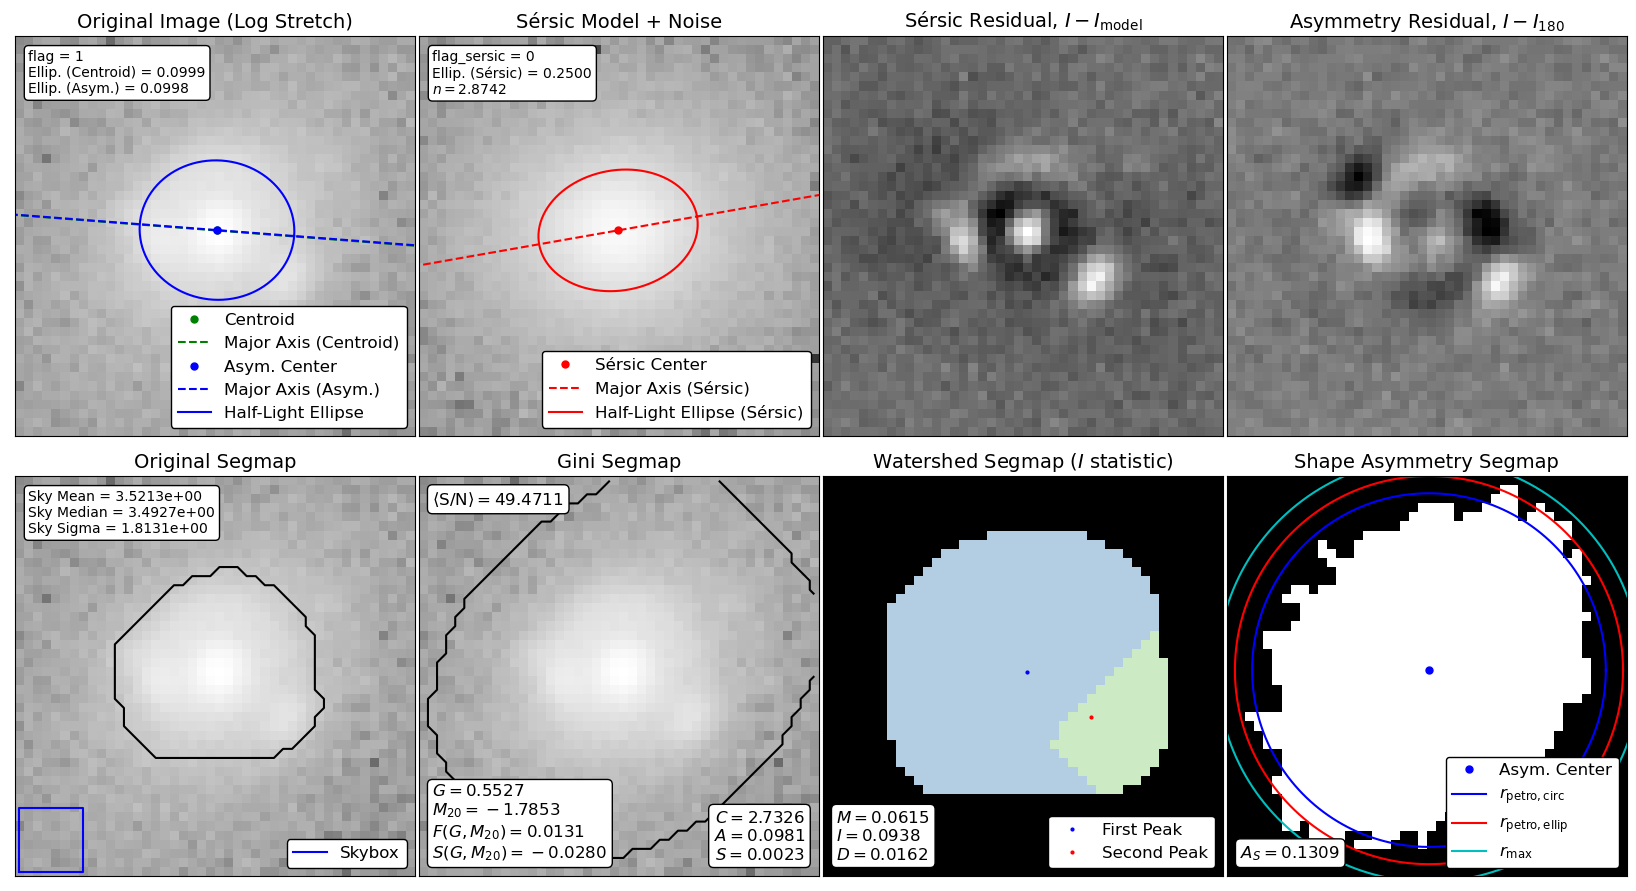

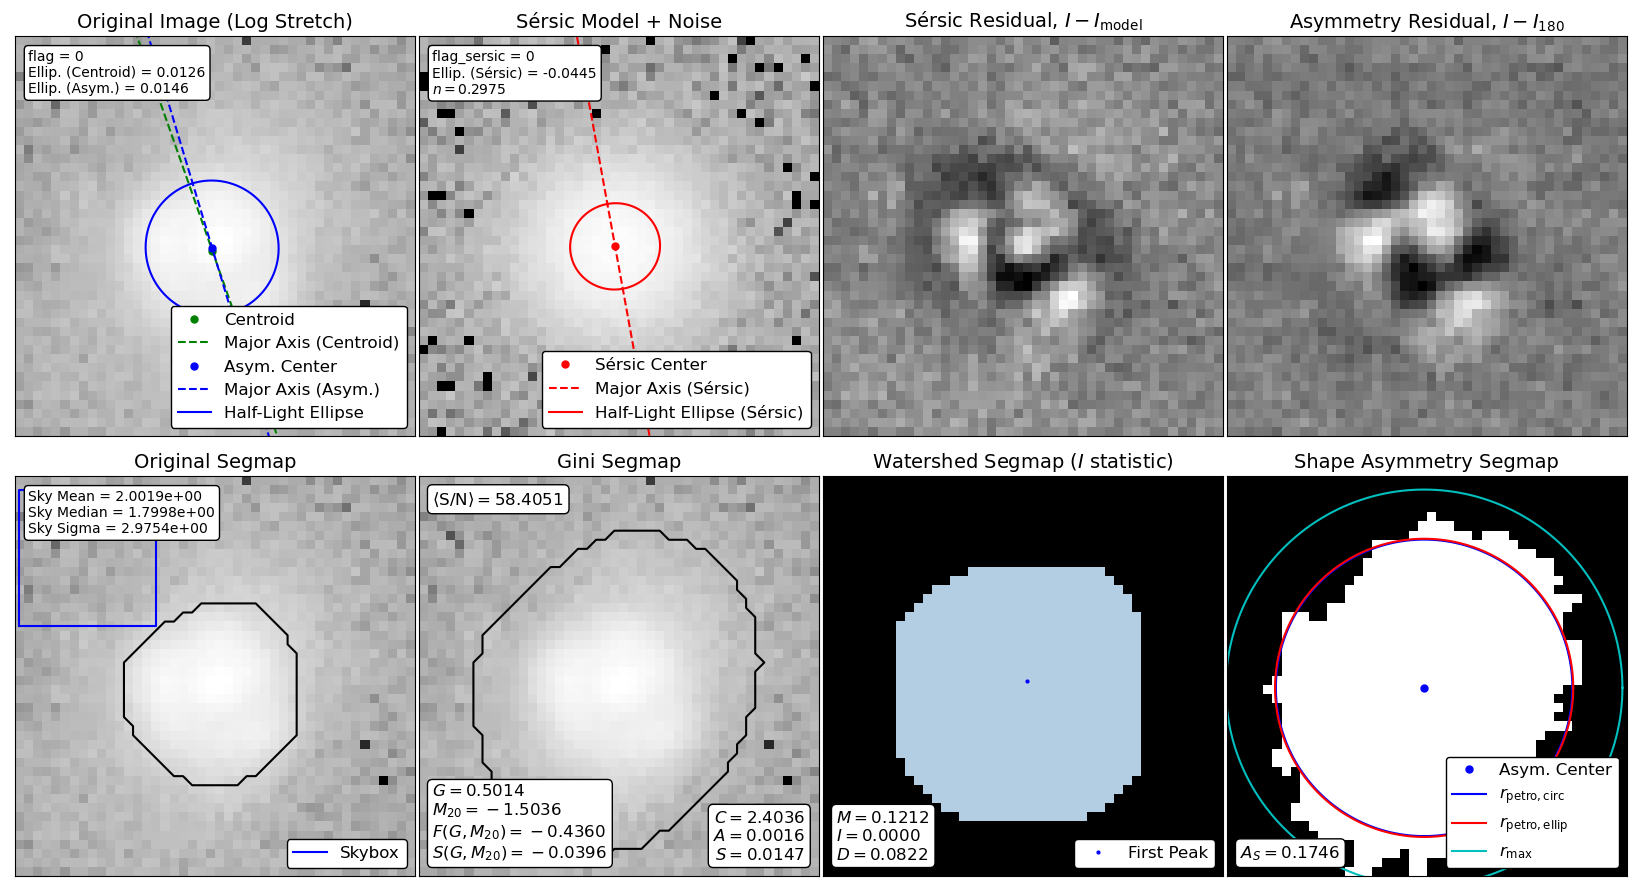

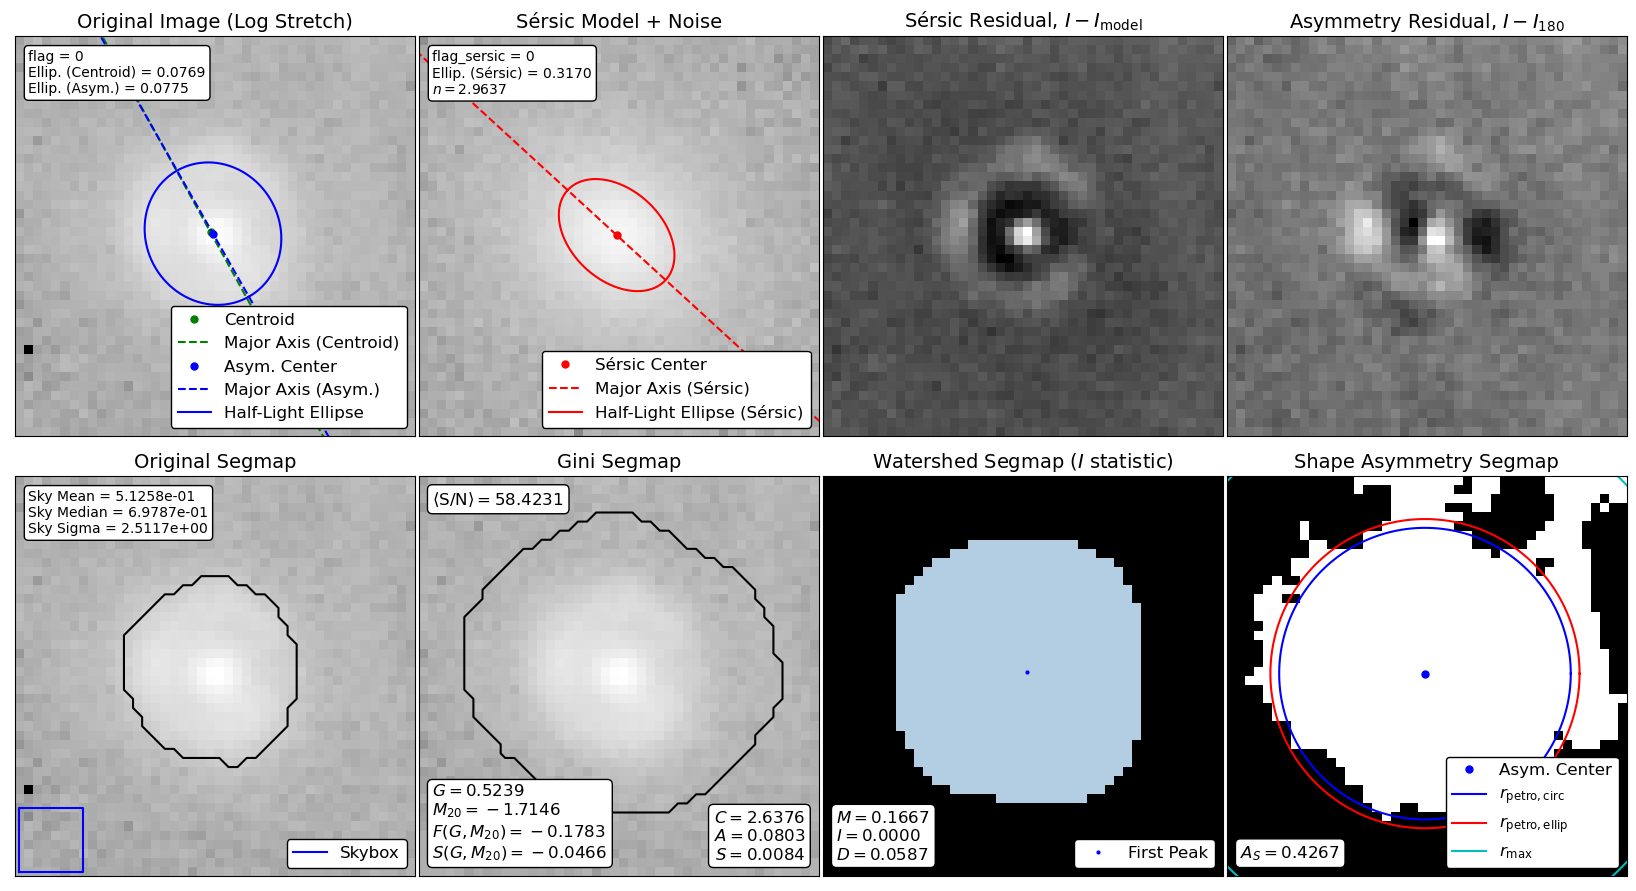

In [18]:
list_segm=[]#we will store segmentation maps

for file in files[:9]:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    if file in os.listdir(path+PSF):
        psf_path=path+PSF+file
        psf,psf_header=fits.getdata(psf_path,header=True)
    else:
        psf=None
    
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
        morph = source_morphs[0]
        print(file)
        print(f'flag_sersic={morph.flag_sersic}')
        print(f'flag={morph.flag}')
        print('sersic_amplitude =', morph.sersic_amplitude)
        print('sersic_rhalf =', morph.sersic_rhalf)
        print('sersic_n =', morph.sersic_n)
        print('sersic_xc =', morph.sersic_xc)
        print('sersic_yc =', morph.sersic_yc)
        print('sersic_ellip =', morph.sersic_ellip)
        print('sersic_theta =', morph.sersic_theta,'\n')
        fig = make_figure(morph)
    except:
        print('bug')

### Let's do the same thing for LRG_only

57037.fits
flag_sersic=0
flag=0
sersic_amplitude = 31.70429852610438
sersic_rhalf = 5.209399823650989
sersic_n = 1.1897846640912264
sersic_xc = 22.740330741510412
sersic_yc = 21.545830531167493
sersic_ellip = 0.032926784881178034
sersic_theta = 0.43026156377622404 



52289.fits
flag_sersic=1
flag=1
sersic_amplitude = 29.651984596227635
sersic_rhalf = 4.7289424241729145
sersic_n = 1.495495446812677
sersic_xc = 22.24154480598545
sersic_yc = 22.222588012850125
sersic_ellip = 0.25704233176985114
sersic_theta = 0.6154149980593199 



42292.fits
flag_sersic=1
flag=1
sersic_amplitude = 35.48149937260665
sersic_rhalf = 4.6003578831213
sersic_n = 2.247232754812386
sersic_xc = 21.379468113003412
sersic_yc = 20.263804828957213
sersic_ellip = 0.04947788363059136
sersic_theta = 2.700601803574229 



148343.fits
flag_sersic=0
flag=1
sersic_amplitude = 23.42235761145387
sersic_rhalf = 9.979041095764433
sersic_n = 1.661078837550679
sersic_xc = 22.17534869512027
sersic_yc = 21.682033345256265
sersic_ellip = 0.18016302366969278
sersic_theta = 2.3445005340767597 

138916.fits
flag_sersic=0
flag=0
sersic_amplitude = 25.237035834687426
sersic_rhalf = 8.301253030797147
sersic_n = 1.44872263410725
sersic_xc = 22.542423290362265
sersic_yc = 22.14908379254284
sersic_ellip = 0.059585121486674324
sersic_theta = 2.316040257861102 



5856.fits
flag_sersic=1
flag=1
sersic_amplitude = 18.286739029715132
sersic_rhalf = 5.305531660247662
sersic_n = 2.50724200327639
sersic_xc = 22.26089845068853
sersic_yc = 21.851939887617274
sersic_ellip = 0.10849502943838507
sersic_theta = 2.42215225288198 



31350.fits
flag_sersic=0
flag=1
sersic_amplitude = 25.349596313572626
sersic_rhalf = 8.994670803963372
sersic_n = 1.251247170944057
sersic_xc = 21.722363303682137
sersic_yc = 22.011411024255402
sersic_ellip = 0.12702187878909518
sersic_theta = 0.7580160815129633 

64654.fits
flag_sersic=0
flag=0
sersic_amplitude = 14.85770785614667
sersic_rhalf = 9.570215262889446
sersic_n = 1.2541032303003132
sersic_xc = 21.802641020769546
sersic_yc = 20.567356227399518
sersic_ellip = 0.1713546201976998
sersic_theta = 0.8703158101871605 



137514.fits
flag_sersic=0
flag=1
sersic_amplitude = 16.408471933206318
sersic_rhalf = 8.555298267051514
sersic_n = 1.6902301319304949
sersic_xc = 21.615801458207518
sersic_yc = 21.632075080550337
sersic_ellip = 0.14471472273372035
sersic_theta = 2.6290568769598135 



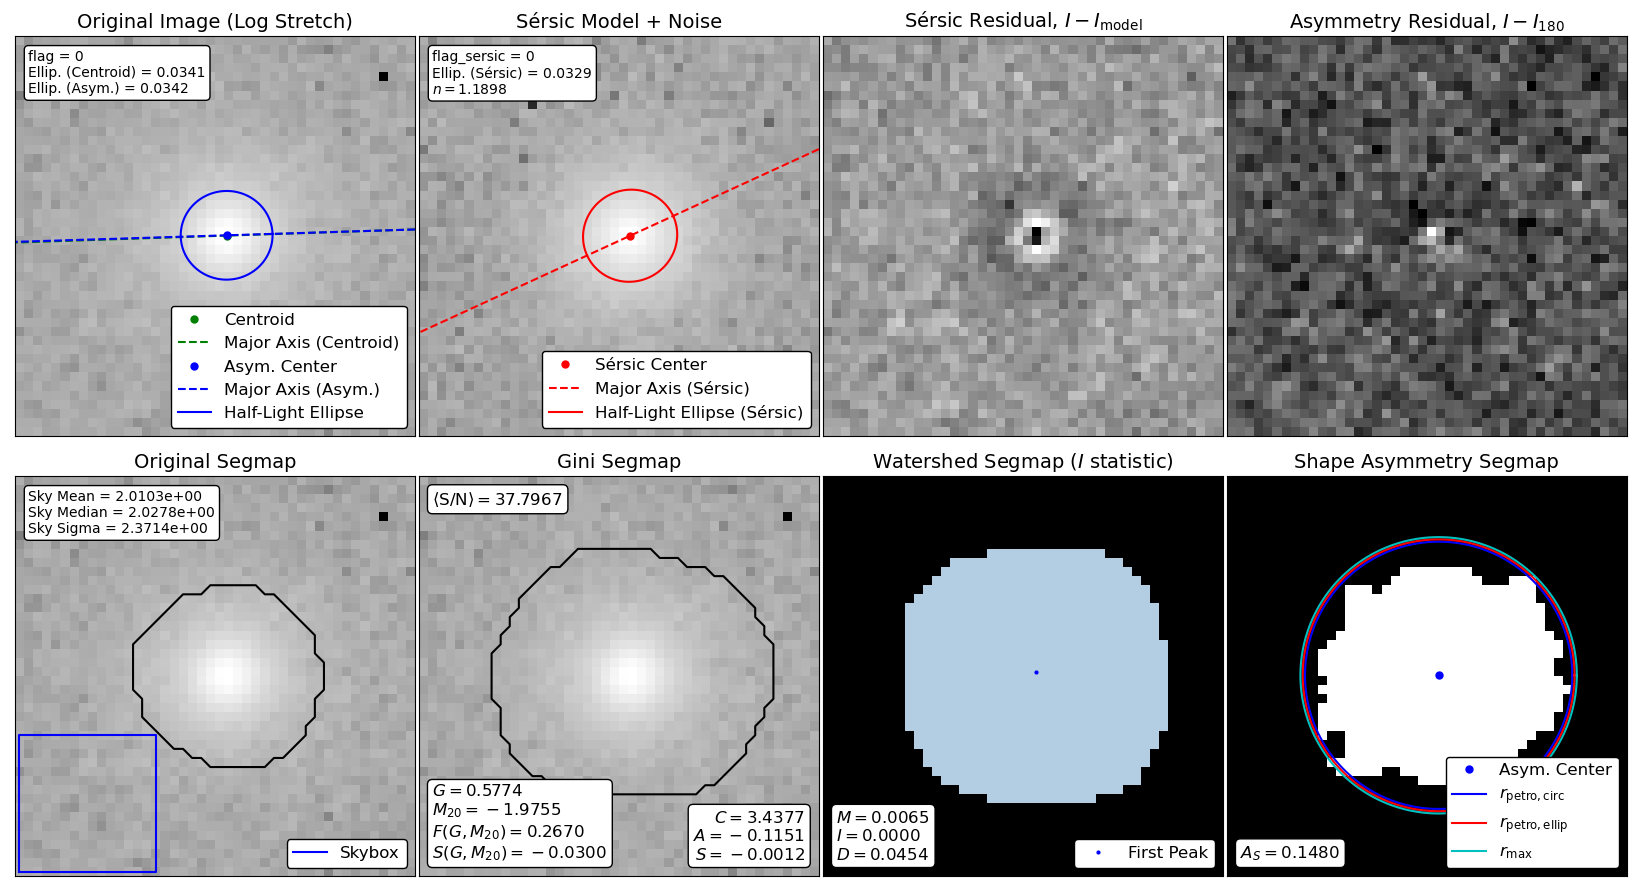

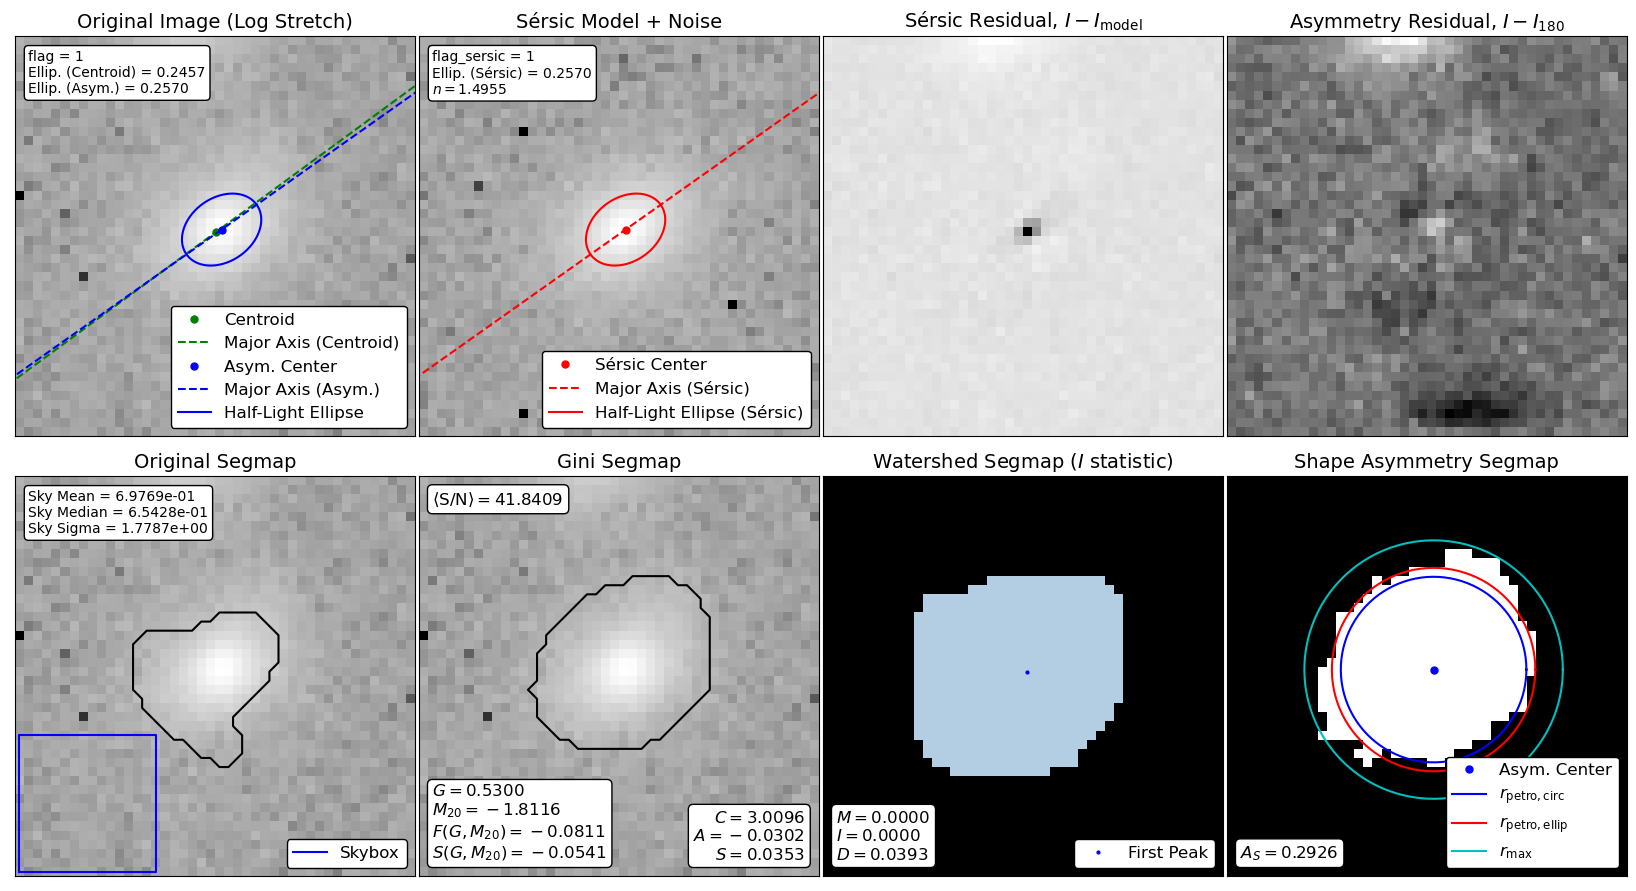

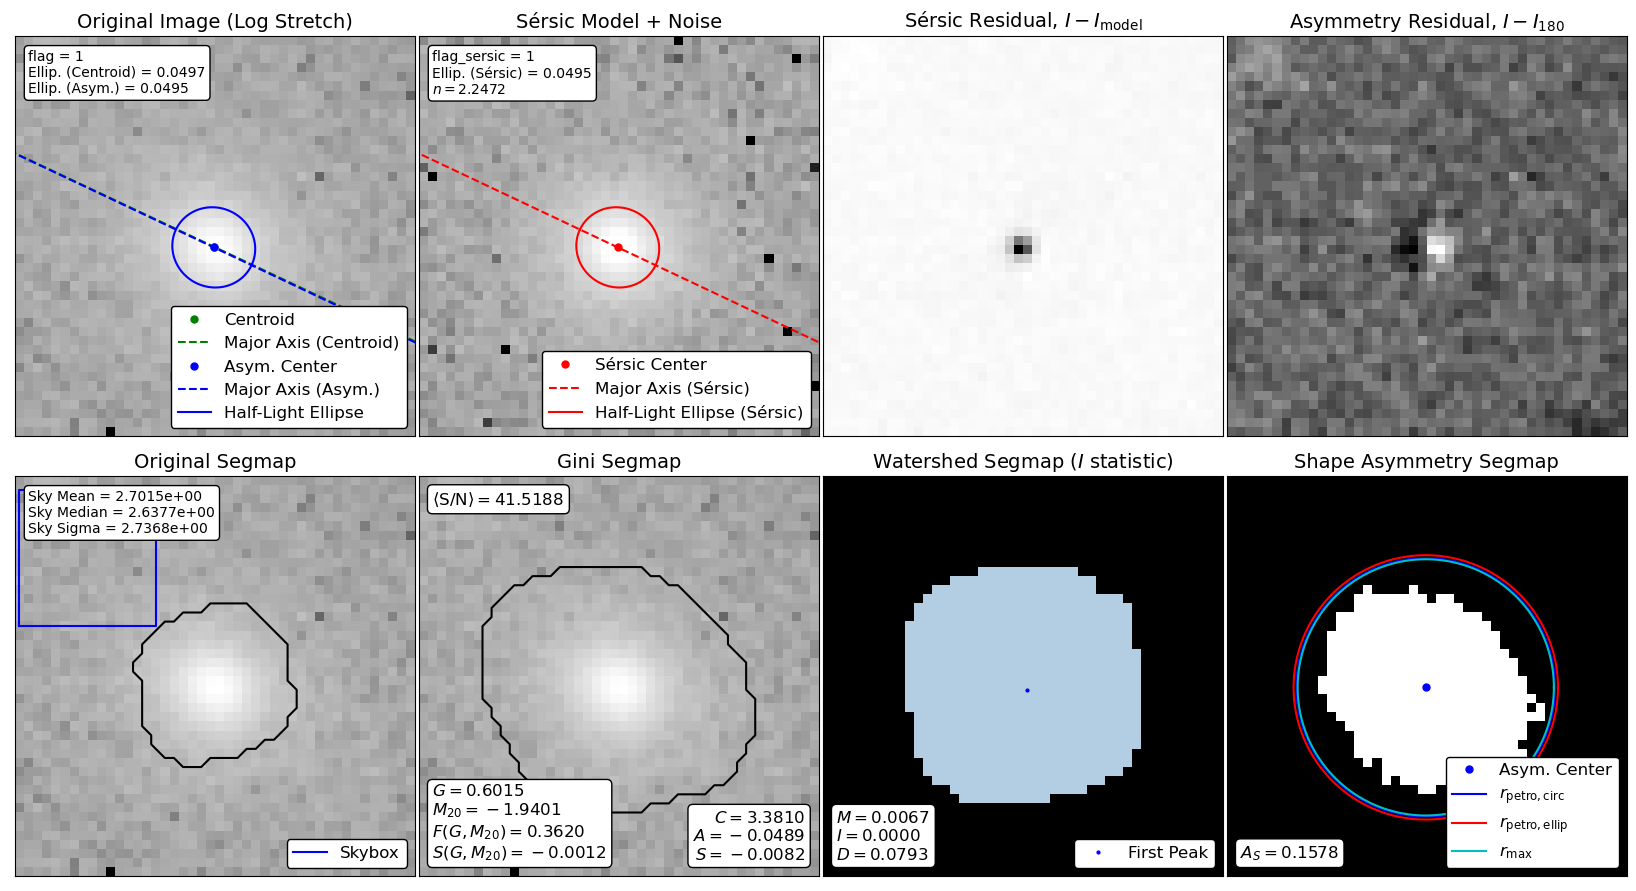

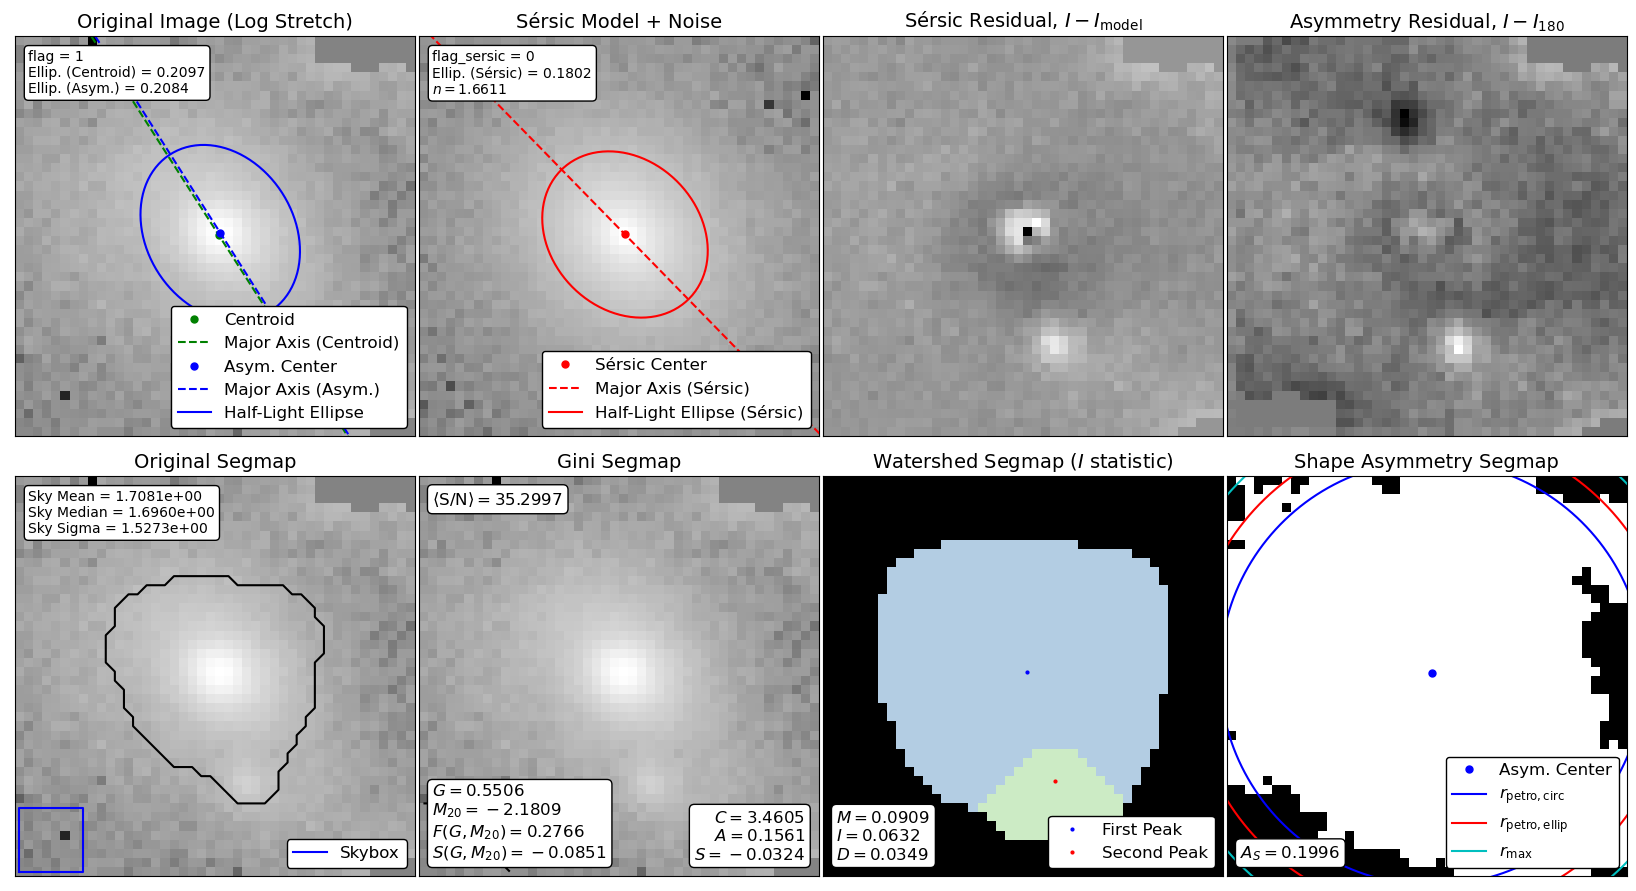

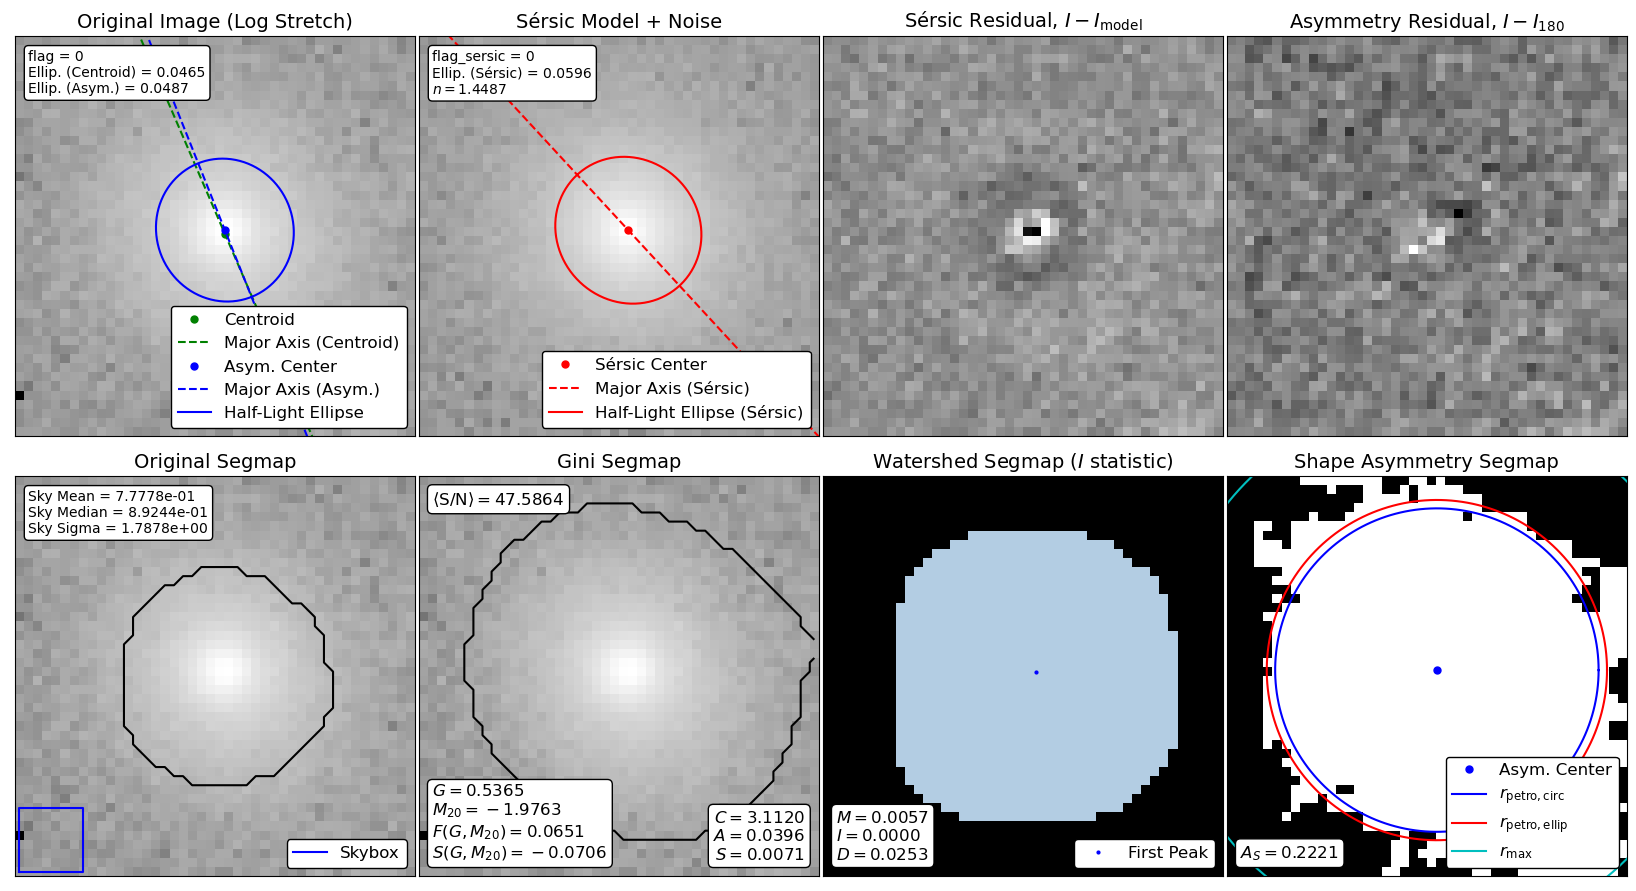

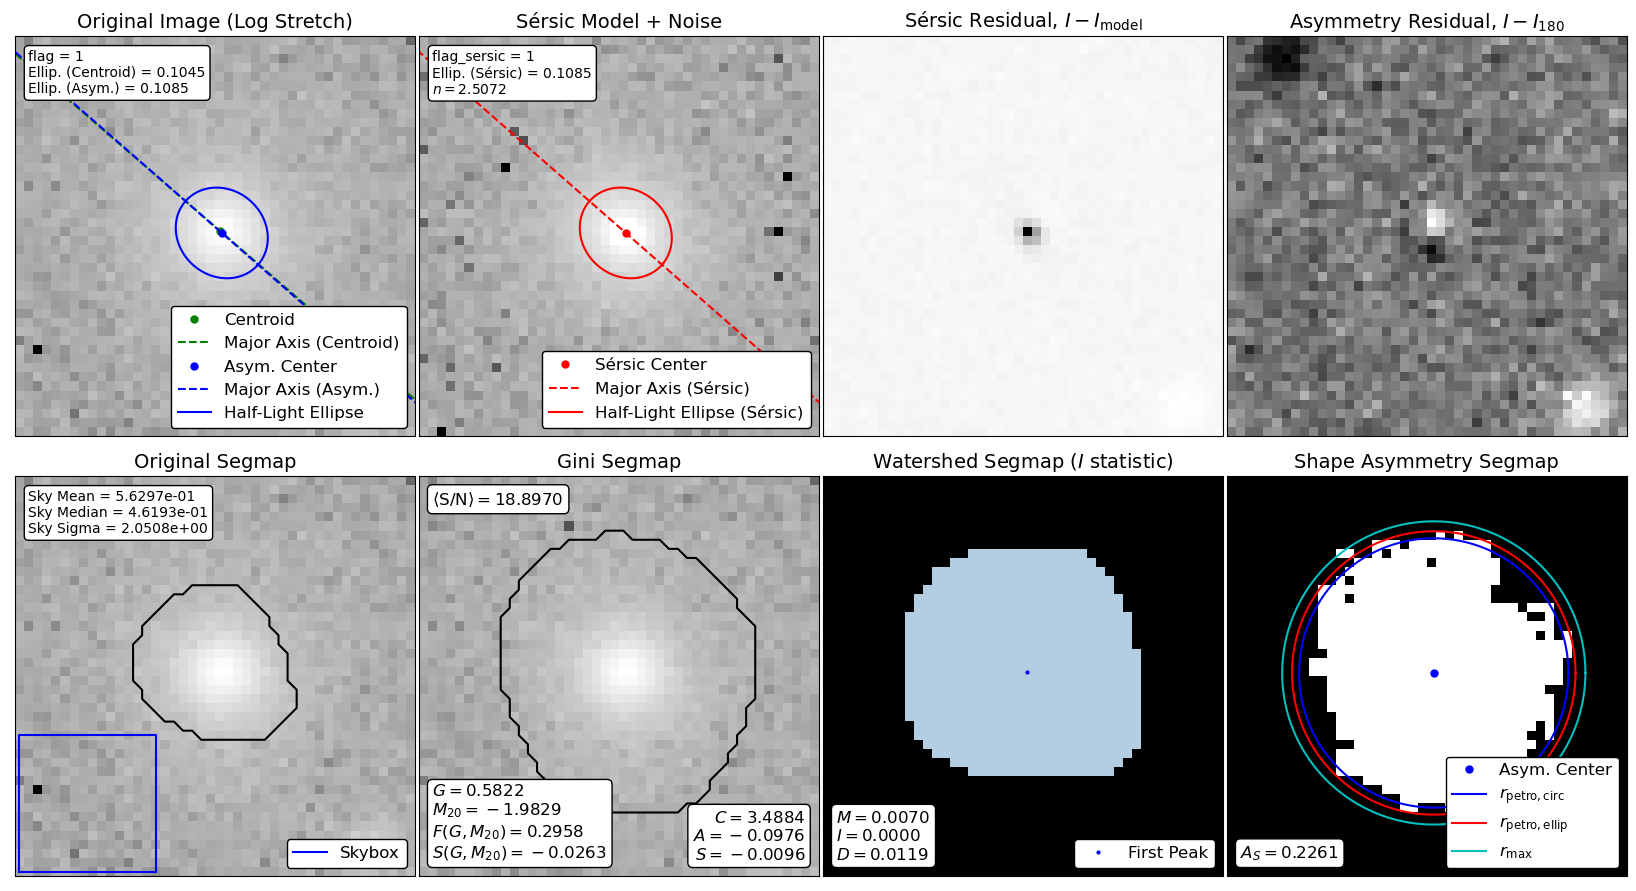

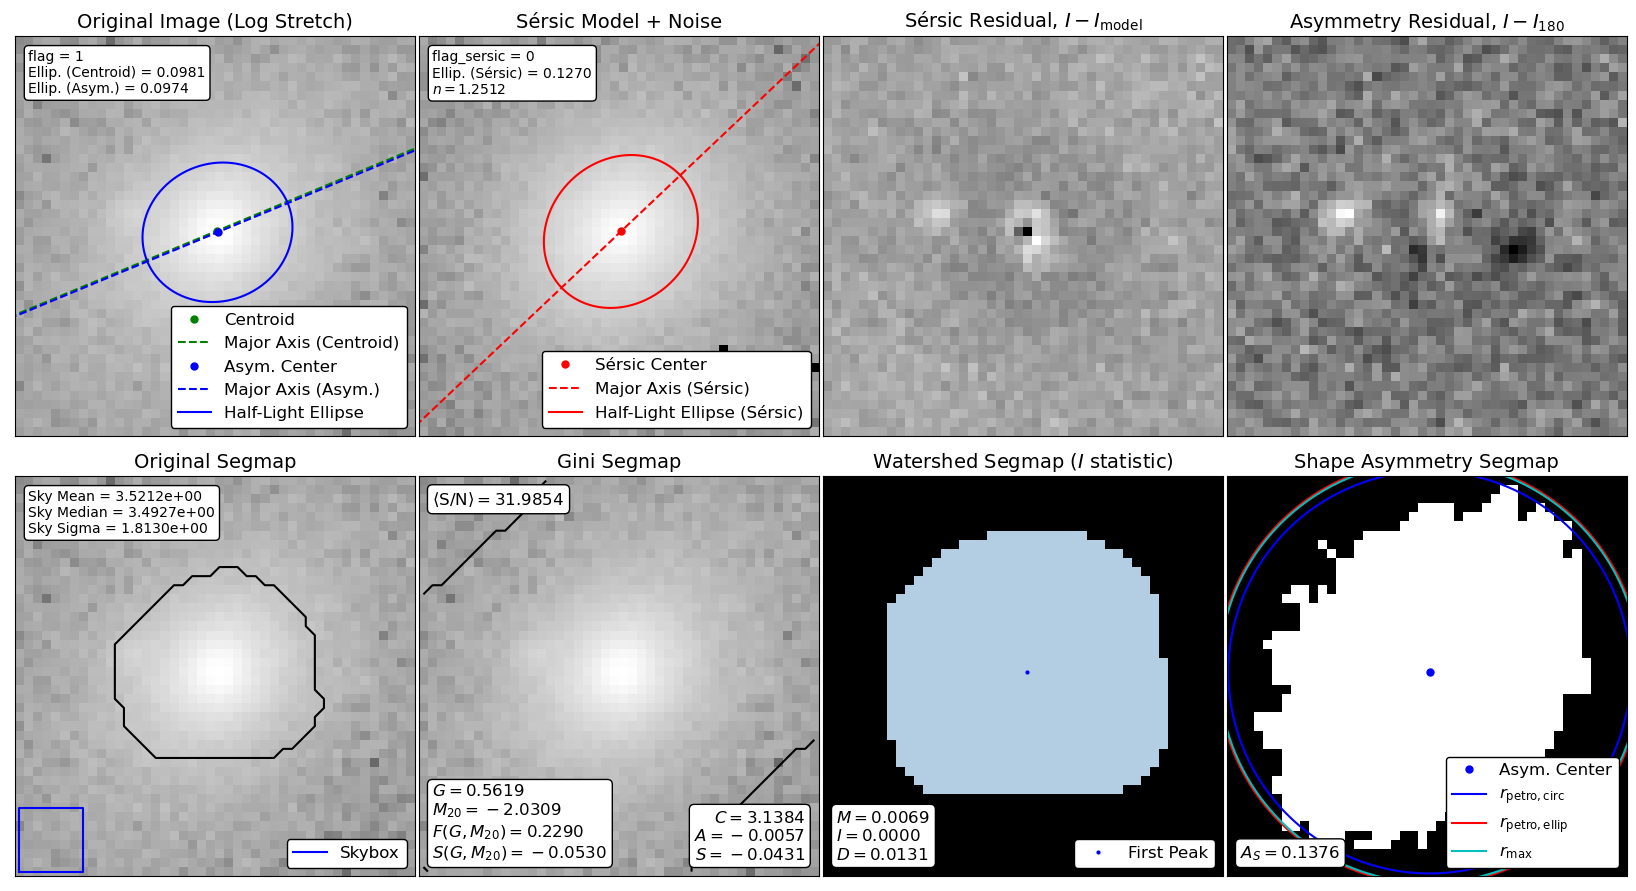

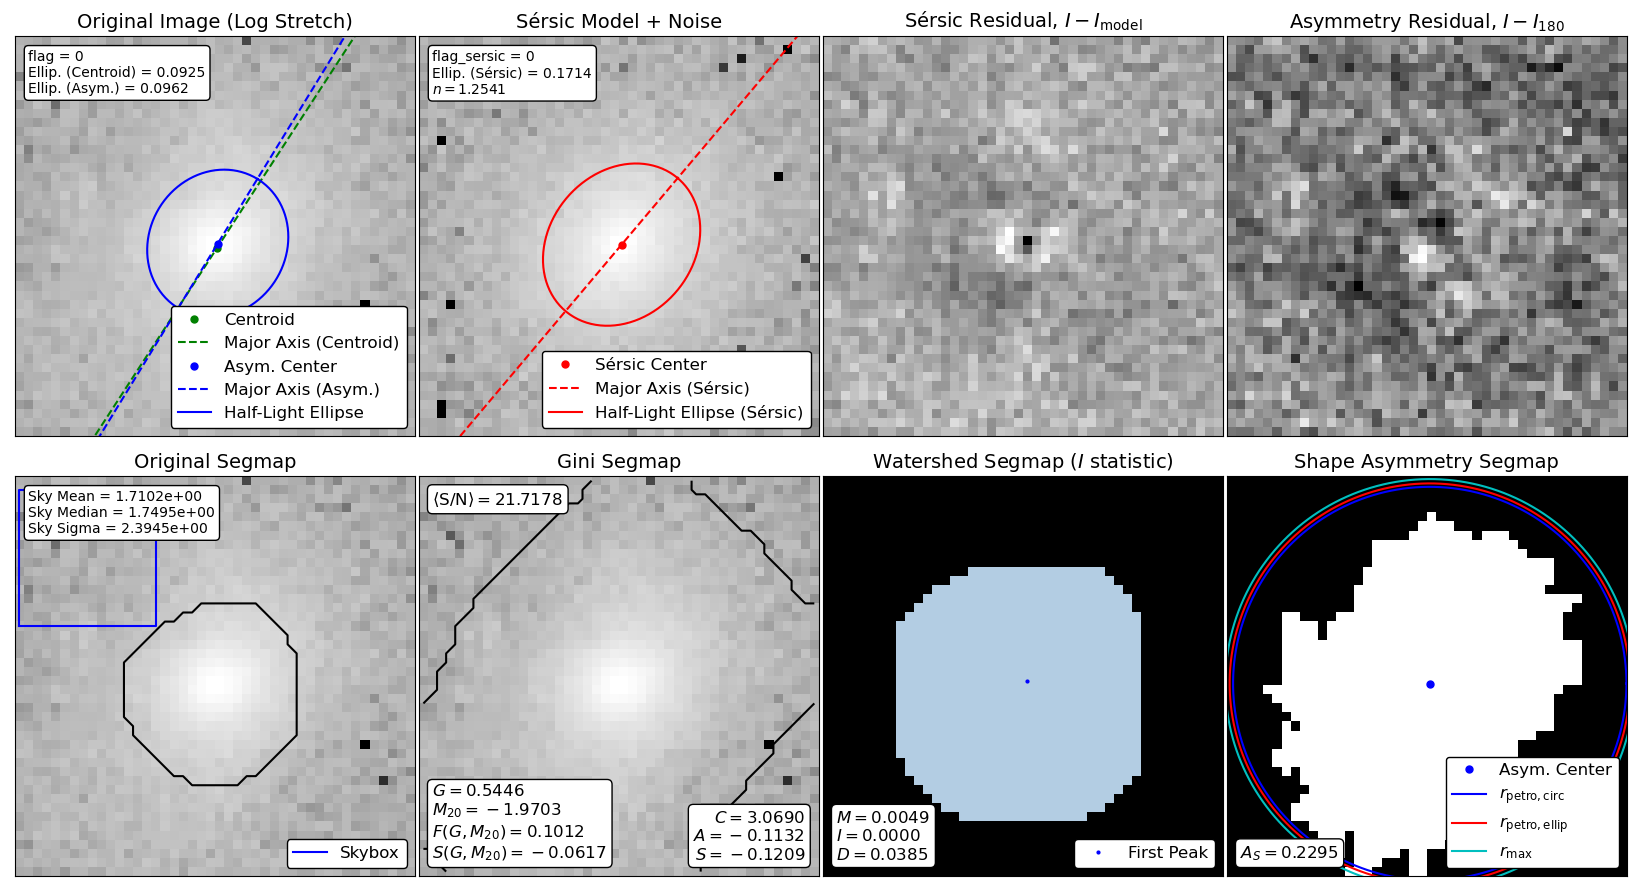

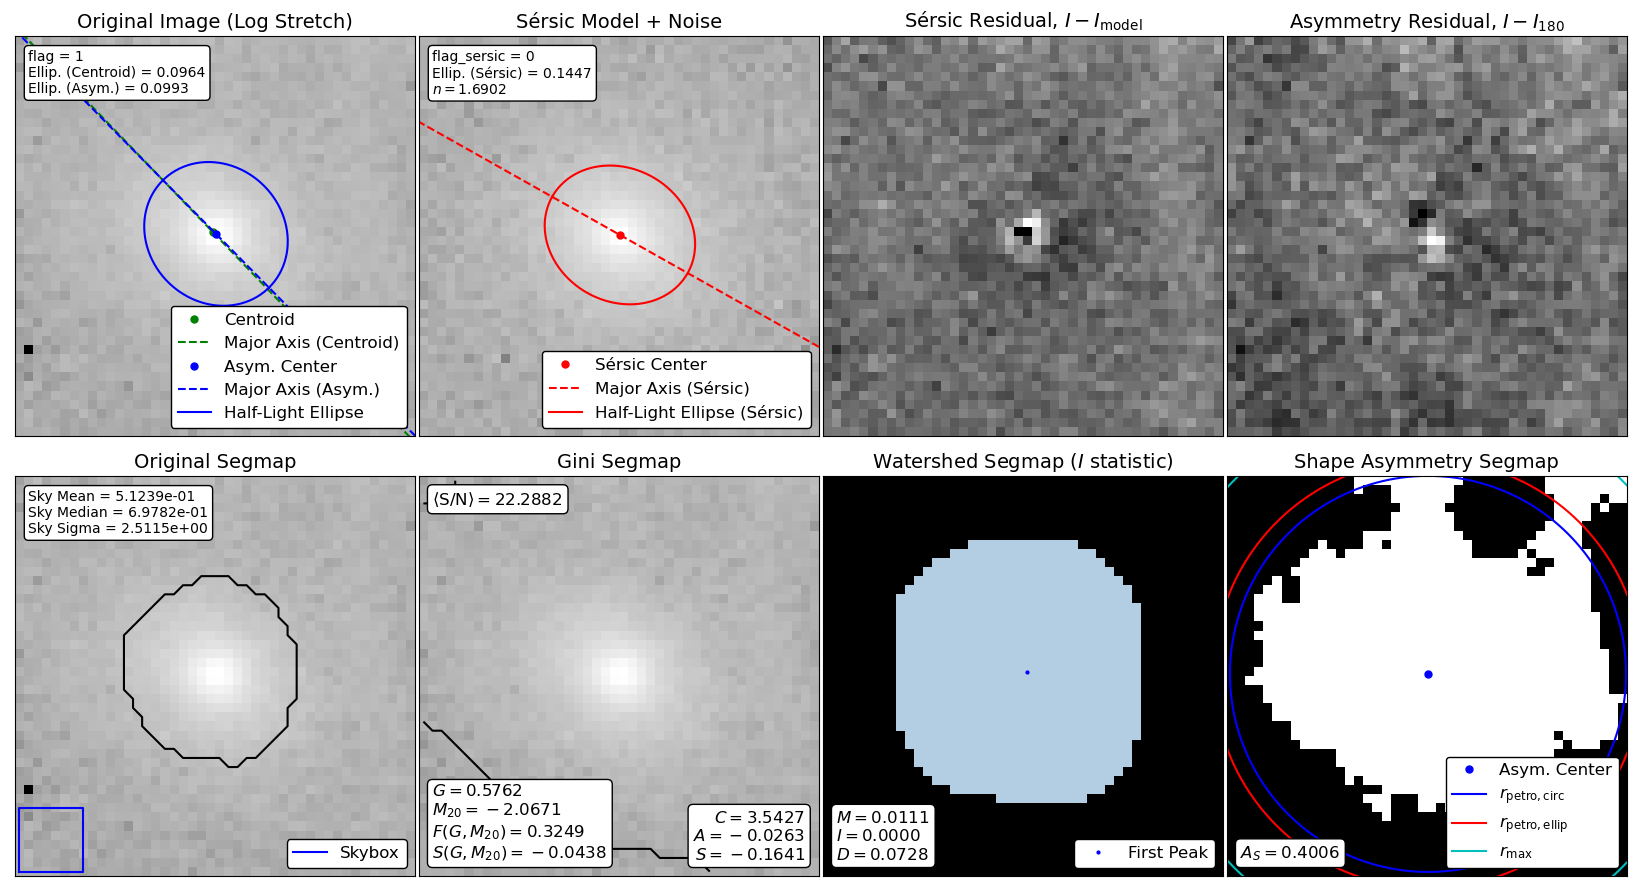

In [15]:
gain=500

for i,file in zip(range(9),files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    segm = list_segm[i]
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    
    
    
    #weight map
    rms_path=path+RMS+file
    rms, rms_header= fits.getdata(rms_path, header=True)
    weight_map=1/rms

    source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask)
    morph = source_morphs[0]
    print(file)
    print(f'flag_sersic={morph.flag_sersic}')
    print(f'flag={morph.flag}')
    print('sersic_amplitude =', morph.sersic_amplitude)
    print('sersic_rhalf =', morph.sersic_rhalf)
    print('sersic_n =', morph.sersic_n)
    print('sersic_xc =', morph.sersic_xc)
    print('sersic_yc =', morph.sersic_yc)
    print('sersic_ellip =', morph.sersic_ellip)
    print('sersic_theta =', morph.sersic_theta,'\n')
    fig = make_figure(morph)

## Let's compare the sersic half radius & sersic ellipticity between lensed and non lensed

In [16]:
subsample_files=np.random.choice(files,300, replace=False)

In [17]:
gain=500.0

list_segm=[]

rhalf_lensed=[]
rhalf_non_lensed=[]
ellip_lensed=[]
ellip_non_lensed=[]
n_lensed=[]
n_non_lensed=[]

for file in subsample_files:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_lensed.append(morph.sersic_rhalf)
            ellip_lensed.append(morph.sersic_ellip)
            n_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')
    

for i,file in zip(range(len(subsample_files)),subsample_files):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    segm = list_segm[i]
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    
    
    
    #weight map
    rms_path=path+RMS+file
    rms, rms_header= fits.getdata(rms_path, header=True)
    weight_map=1/rms
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_non_lensed.append(morph.sersic_rhalf)
            ellip_non_lensed.append(morph.sersic_ellip)
            n_non_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')

bug


bug


bug


bug


bug


bug


bug


bug


bug


bug


bug


bug


bug


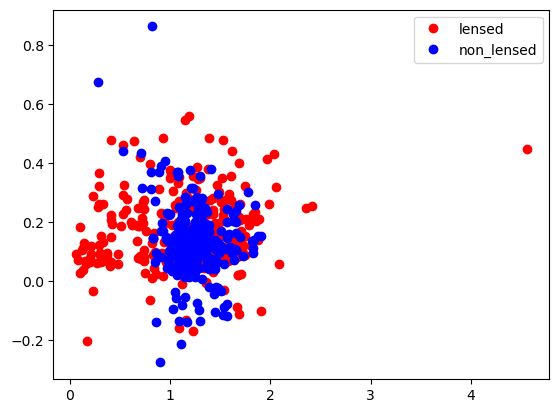

In [18]:
plt.plot(n_lensed,ellip_lensed,'ro',label='lensed')
plt.plot(n_non_lensed,ellip_non_lensed,'bo',label="non_lensed")
plt.legend()

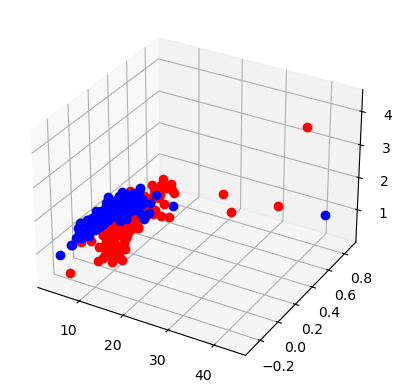

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(rhalf_lensed, ellip_lensed, n_lensed, 'ro', label="lensed")
ax.plot3D(rhalf_non_lensed, ellip_non_lensed, n_non_lensed, 'bo', label="lensed")
plt.ion()
plt.show()